In [1]:
from hlm_basic.hlm_models import dam_q, dam_q_varParam, dam_q_varParam_varState
import matplotlib.pyplot as plt
from matplotlib import rcParams
import numpy as np
import math
import seaborn as sns 

In [3]:
def plot_QSv(h_spill, h_max, s_max, alpha, diameter,c1, c2, L_spill, L_crest, state=1, area=None, axes=None, save=None):
    rcParams.update({'font.size': 13,'axes.labelweight':'bold','axes.labelsize':14,\
                                'ytick.major.size':6,'xtick.major.size':6,'xtick.direction':'in','ytick.direction':'in',\
                                'lines.linewidth':2.5})
    dam_params = ['pass',h_spill, h_max, s_max, alpha, diameter,c1, c2, L_spill, L_crest]
    storage = np.arange(0, s_max+50000, 100)
    height = [h_max * pow(ss / s_max, alpha) for ss in storage]
    discharge = [dam_q(hh, state, dam_params) for hh in height]
    
    ## Plot height-storage relationship
    if axes is not None:
        ax1 = axes[0]
        ax2 = axes[1]
    else:
        fig, ax = plt.subplots(1, 2, figsize=(12, 6), sharex=True)
        ax1 = ax[0]
        ax2 = ax[1]
    ax1.plot(storage, height, c ='k')
    ax1.axvline(x=s_max, c='r', linewidth=2)
    ax1.set(xlabel='Storage [10$^3$ m$^{3}$]',ylabel ='Height [m]',)
    ax1.grid()
    ax1.set_xticks(np.arange(0, s_max+50000, 100000))
    ax1.set_xticklabels(np.arange(0, (s_max+50000)/1000, 100).astype(int))
    ## Plot discharge-storage relationship
    ax2.plot(storage, discharge, c ='k')
    ax2.axvline(x=s_max, c='r', linewidth=2)
    if area is not None:
        ax2.axhline(y=3.12*(area**(0.57)), c='cyan', linewidth=2)
    ax2.set(xlabel='Storage [10$^3$ m$^3$]',ylabel ='Discharge [m$^3$/s]')
    ax2.grid()
    plt.subplots_adjust(wspace=0.3)
    plt.suptitle('H$_{spill}$=%.1fm   H$_{max}$=%.1fm  S$_{max}$=%dm$^3$'r'   $\alpha$=%.1f''\n'\
                    ' OD=%.2fm   c$_1$= %.1f    c$_2$=%.2f    L$_{spill}$=%.1fm    L$_{crest}$=%.1fm'\
                    %(h_spill, h_max, s_max, alpha,diameter,c1, c2, L_spill, L_crest ), size=15, y=1.05)
    if save is not None:
        fig.savefig(save + '.png', bbox_inches = 'tight', pad_inches = 0.5)
    return ax1, ax2

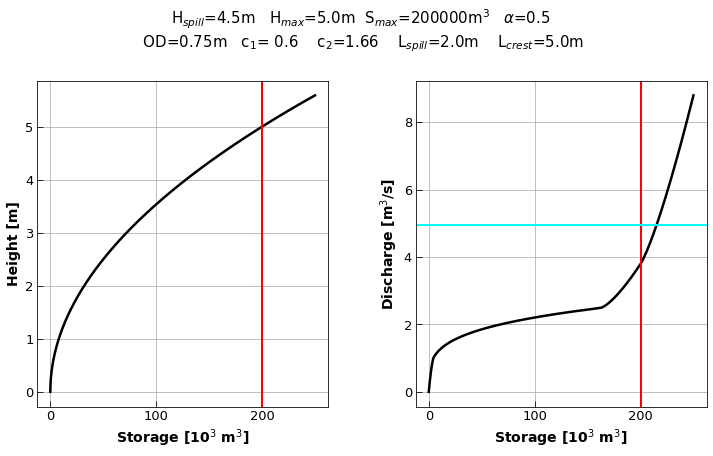

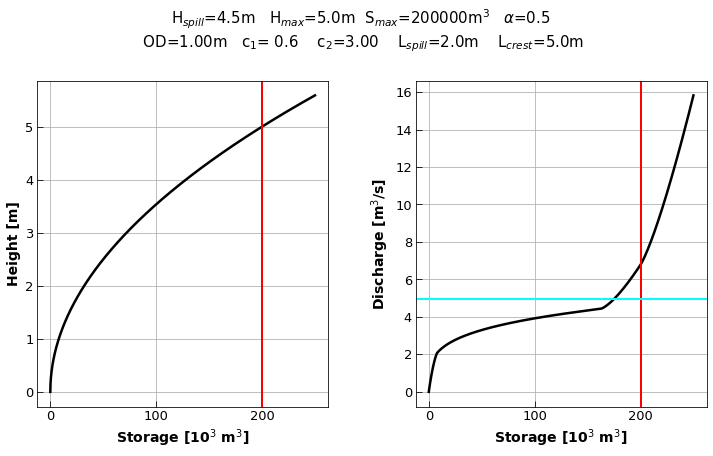

In [4]:
### USE this for order three
ax1, ax2 = plot_QSv(4.5, 5, 200000, 0.5, 0.75, 0.6, 1.66, 2, 5, state=1, area=2.25) #old setup
ax1, ax2 = plot_QSv(4.5, 5, 200000, 0.5, 1.0, 0.6, 3.0, 2, 5, state=1, area=2.25) #new setup


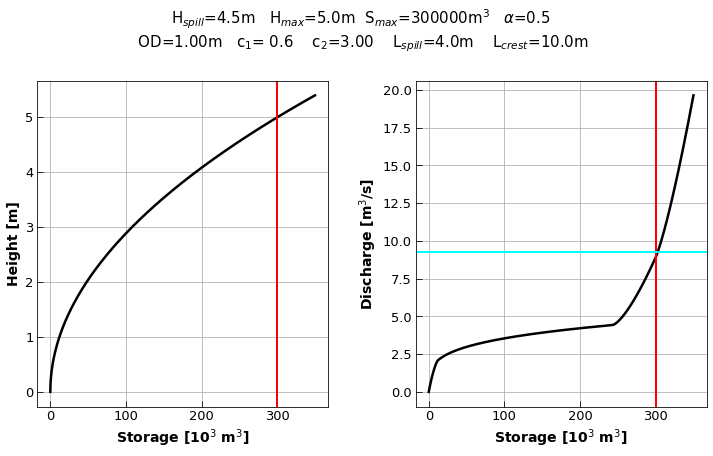

In [32]:
# USE this for order 4
ax1, ax2 = plot_QSv(4.5, 5, 300000, 0.5, 1.0, 0.6, 3.0, 4, 10, state=1, area=6.75)   

In [2]:
storage = np.arange(0,  300000, 100)
height = [5.0 * pow(ss /  300000, 0.5) for ss in storage]
discharge = [dam_q_varParam_varState(hh, 0, 4.5, 5, 1.0, 0.6, 3.0, 4, 10,) for hh in height]
discharge2 = [dam_q_varParam_varState(hh, 0.25, 4.5, 5, 1.0, 0.6, 3.0, 4, 10,) for hh in height]
discharge3 = [dam_q_varParam_varState(hh, 0.50, 4.5, 5, 1.0, 0.6, 3.0, 4, 10,) for hh in height]
discharge4 = [dam_q_varParam_varState(hh, 0.75, 4.5, 5, 1.0, 0.6, 3.0, 4, 10,) for hh in height]
discharge5 = [dam_q_varParam_varState(hh, 1.0, 4.5, 5, 1.0, 0.6, 3.0, 4, 10,) for hh in height]




([<matplotlib.axis.YTick at 0x2aa08d766c8>,
 <a list of 3 Text yticklabel objects>)

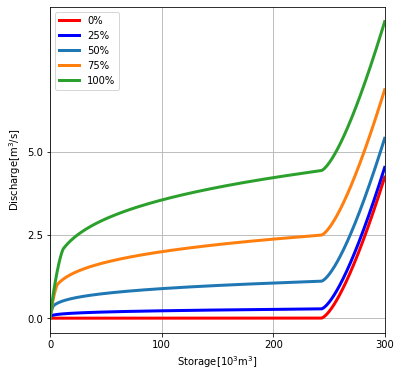

In [37]:
rcParams.update({'lines.linewidth':3})
plt.subplots(figsize=(6, 6))
plt.plot(storage, discharge, c='r', label='0%')
plt.plot(storage, discharge2, c='b', label='25%')
plt.plot(storage, discharge3, label='50%')
plt.plot(storage, discharge4, label='75%')
plt.plot(storage, discharge5, label='100%')
plt.legend()
plt.xlim([0, 200000])
plt.xlabel('Storage[10$^3$m$^3$]')
plt.ylabel('Discharge[m$^3$/s]')
plt.grid()
plt.xticks(np.arange(0, 300000+50000, 100000), labels=np.arange(0, 350, 100))
plt.yticks(np.arange(0, 7.5, 2.5))


([<matplotlib.axis.YTick at 0x1b8244b24f0>,
 <a list of 3 Text yticklabel objects>)

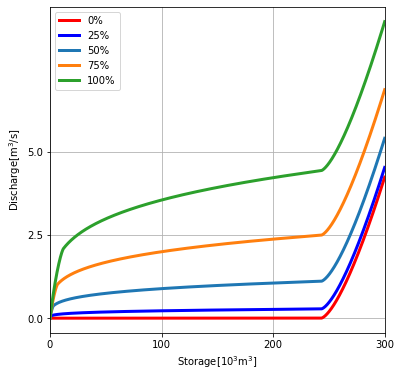

In [3]:
#Order 4 dam
rcParams.update({'lines.linewidth':3})
plt.subplots(figsize=(6, 6))
plt.plot(storage, discharge, c='r', label='0%')
plt.plot(storage, discharge2, c='b', label='25%')
plt.plot(storage, discharge3, label='50%')
plt.plot(storage, discharge4, label='75%')
plt.plot(storage, discharge5, label='100%')
plt.legend()
plt.xlim([0, 200000])
plt.xlabel('Storage[10$^3$m$^3$]')
plt.ylabel('Discharge[m$^3$/s]')
plt.grid()
plt.xticks(np.arange(0, 300000+50000, 100000), labels=np.arange(0, 350, 100))
plt.yticks(np.arange(0, 7.5, 2.5))

In [4]:
storage = np.arange(0,  200000, 100)
height = [5.0 * pow(ss /  200000, 0.5) for ss in storage]
discharge = [dam_q_varParam_varState(hh, 0, 4.5, 5, 1.0, 0.6, 3.0, 2, 5) for hh in height]
discharge2 = [dam_q_varParam_varState(hh, 0.25, 4.5, 5, 1.0, 0.6, 3.0, 2, 5) for hh in height]
discharge3 = [dam_q_varParam_varState(hh, 0.50, 4.5, 5, 1.0, 0.6, 3.0, 2, 5) for hh in height]
discharge4 = [dam_q_varParam_varState(hh, 0.75, 4.5, 5, 1.0, 0.6, 3.0, 2, 5) for hh in height]
discharge5 = [dam_q_varParam_varState(hh, 1.0, 4.5, 5, 1.0, 0.6, 3.0, 2, 5) for hh in height]

([<matplotlib.axis.YTick at 0x1b825844490>,
 <a list of 3 Text yticklabel objects>)

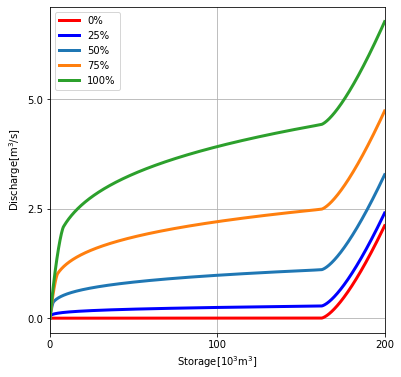

In [6]:
#Order 3 dam 
rcParams.update({'lines.linewidth':3})
plt.subplots(figsize=(6, 6))
plt.plot(storage, discharge, c='r', label='0%')
plt.plot(storage, discharge2, c='b', label='25%')
plt.plot(storage, discharge3, label='50%')
plt.plot(storage, discharge4, label='75%')
plt.plot(storage, discharge5, label='100%')
plt.legend()
plt.xlim([0, 200000])
plt.xlabel('Storage[10$^3$m$^3$]')
plt.ylabel('Discharge[m$^3$/s]')
plt.grid()
plt.xticks(np.arange(0, 200000+50000, 100000), labels=np.arange(0, 250, 100))
plt.yticks(np.arange(0, 7.5, 2.5))